In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#plt.style.use("classic")

import warnings
warnings.filterwarnings("ignore")


###
1. extracting stock from yf (tickers, start="2024-01-01", end="2024-12-08", interval="1d",period="1mo")
2. calculate min, max,np.mean,pd.quantile(0.25)
   diff::Calculate the change between neighboring rows
   pct_change:Calculate the percentage change between neighboring rows
   
3. How much does $1 on the first day equate to on the last day, holding yield
4. long and short-term moving average, gold and death cross

In [32]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
ticker = yf.Ticker("AAPL")
df = ticker.history(period="1mo", interval="1d")  # 获取当天的每分钟数据
df.head(20)
#df.plot(figsize=(12,12),subplots = True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-04 00:00:00-05:00,220.747138,222.545148,219.468546,221.766006,44944500,0.00,0.0
2024-11-05 00:00:00-05:00,221.556241,223.703872,220.896963,223.204422,28111300,0.00,0.0
2024-11-06 00:00:00-05:00,222.365355,225.821559,220.946918,222.475235,54561100,0.00,0.0
2024-11-07 00:00:00-05:00,224.383137,227.629565,224.323205,227.229996,42137700,0.00,0.0
2024-11-08 00:00:00-05:00,227.169998,228.660004,226.410004,226.960007,38328800,0.25,0.0
2024-11-11 00:00:00-05:00,225.000000,225.699997,221.500000,224.229996,42005600,0.00,0.0
2024-11-12 00:00:00-05:00,224.550003,225.589996,223.360001,224.229996,40398300,0.00,0.0
2024-11-13 00:00:00-05:00,224.009995,226.649994,222.759995,225.119995,48566200,0.00,0.0
2024-11-14 00:00:00-05:00,225.020004,228.869995,225.000000,228.220001,44923900,0.00,0.0


In [53]:
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
# 批量下载股票数据
data = yf.download(tickers, start="2010-01-01", end="2018-12-08", interval="1d")

# 提取收盘价数据
close_prices = data['Close']
close_prices.head()

#df.index = pd.to_datetime(df.index, errors='coerce')

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2010-01-04,7.643214,6.6950,15.684434,30.950001,NaN
2010-01-05,7.656429,6.7345,15.615365,30.959999,NaN
2010-01-06,7.534643,6.6125,15.221722,30.770000,NaN
2010-01-07,7.520714,6.5000,14.867367,30.450001,NaN
2010-01-08,7.570714,6.6760,15.065566,30.660000,NaN


In [15]:
close_prices.info()
close_prices.describe().round(2)
#close_prices.aggregate([min, max,np.mean,pd.quantile(0.25)])

#close_prices.diff().head()
#每天的增长率
close_prices.pct_change().head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236 entries, 2024-01-02 to 2024-12-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    236 non-null    float64
 1   AMZN    236 non-null    float64
 2   GOOGL   236 non-null    float64
 3   MSFT    236 non-null    float64
 4   TSLA    236 non-null    float64
dtypes: float64(5)
memory usage: 11.1 KB


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-02,NaN,NaN,NaN,NaN,NaN
2024-01-03,-0.007488,-0.009738,0.005428,-0.000728,-0.040134
2024-01-04,-0.012700,-0.026268,-0.018212,-0.007178,-0.002181
2024-01-05,-0.004013,0.004634,-0.004839,-0.000516,-0.001849
2024-01-08,0.024175,0.026577,0.022913,0.018872,0.012464


In [18]:
#每天的增长率
close_prices.pct_change().mean().plot(kind="bar",figsize = (10,6))


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-02,-0.007488,-0.009738,0.005428,-0.000728,-0.040134
2024-01-03,-0.012700,-0.026268,-0.018212,-0.007178,-0.002181
2024-01-04,-0.004013,0.004634,-0.004839,-0.000516,-0.001849
2024-01-05,0.024175,0.026577,0.022913,0.018872,0.012464
2024-01-08,-0.002263,0.015225,0.015197,0.002936,-0.022832


<Axes: xlabel='Date'>

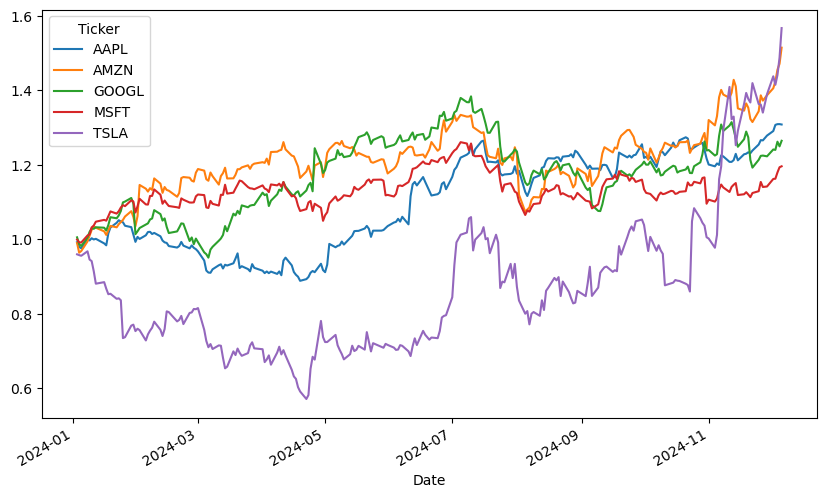

In [24]:
#How much does $1 on the first day equate to on the last day
ccon_change = np.log(close_prices/close_prices.shift(1))
ccon_change.head().round(3)
#restore
ccon_change.cumsum().apply(np.exp).plot(figsize=(10,6))

In [27]:
#close_prices.resample("1w").last().head()
close_prices.resample("1w",label = "right").last().head()

C:\Users\602599140\AppData\Local\Temp\ipykernel_8664\3254796966.py:1: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  close_prices.resample("1w").last().head()
C:\Users\602599140\AppData\Local\Temp\ipykernel_8664\3254796966.py:2: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  close_prices.resample("1w",label = "right").last().head()


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2024-01-07,181.179993,145.240005,135.729996,367.750000,237.490005
2024-01-14,185.919998,154.619995,142.649994,388.470001,218.889999
2024-01-21,191.559998,155.339996,146.380005,398.670013,212.190002
2024-01-28,192.419998,159.119995,152.190002,403.929993,183.250000
2024-02-04,185.850006,171.809998,142.380005,411.220001,187.910004


In [3]:
＃df = close_prices.dropna()
#10天为窗口滑动
windows = 10

df["AAPL"].rolling(window = windows).mean()

Date
2024-01-02           NaN
2024-01-03           NaN
2024-01-04           NaN
2024-01-05           NaN
2024-01-08           NaN
                 ...    
2024-12-02    232.346999
2024-12-03    233.809998
2024-12-04    235.282997
2024-12-05    236.686996
2024-12-06    238.118996
Name: AAPL, Length: 236, dtype: float64

In [4]:
#短均和长均
df = close_prices

df["20d"] = df["AAPL"].rolling(window = 20).mean()
df["60d"] = df["AAPL"].rolling(window = 60).mean()


C:\Users\602599140\AppData\Local\Temp\ipykernel_14072\2286771958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["20d"] = df["AAPL"].rolling(window = 20).mean()
C:\Users\602599140\AppData\Local\Temp\ipykernel_14072\2286771958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["60d"] = df["AAPL"].rolling(window = 60).mean()


In [5]:
#death cross and gold cross
df["avg_jud"]= np.where(df["20d"]>df["60d"],1,-1)
df.head()

C:\Users\602599140\AppData\Local\Temp\ipykernel_14072\1124018969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["avg_jud"]= np.where(df["20d"]>df["60d"],1,-1)


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA,20d,60d,avg_jud
Date,,,,,,,,
2024-01-02,185.639999,149.929993,138.169998,370.869995,248.419998,NaN,NaN,-1
2024-01-03,184.250000,148.470001,138.919998,370.600006,238.449997,NaN,NaN,-1
2024-01-04,181.910004,144.570007,136.389999,367.940002,237.929993,NaN,NaN,-1
2024-01-05,181.179993,145.240005,135.729996,367.750000,237.490005,NaN,NaN,-1
2024-01-08,185.559998,149.100006,138.839996,374.690002,240.449997,NaN,NaN,-1


<Axes: xlabel='Date'>

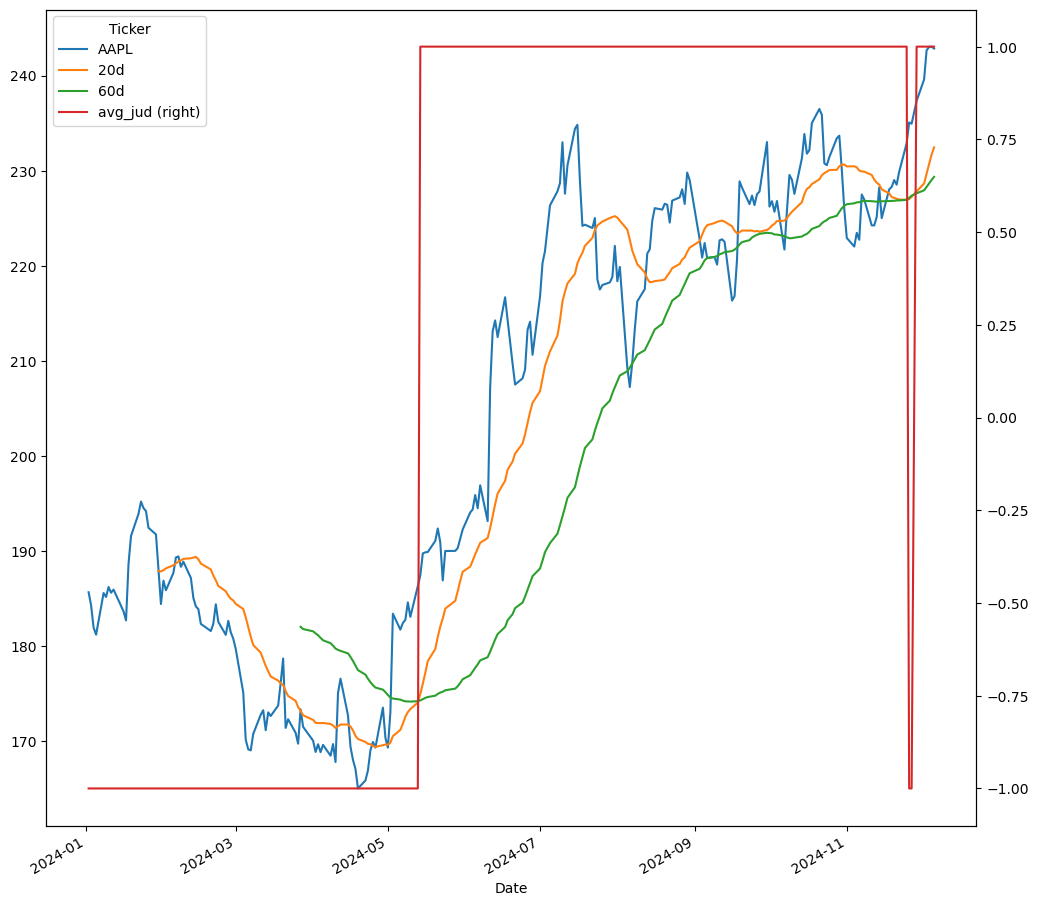

In [6]:
df[["AAPL","20d","60d"]].tail()
#df[["AAPL","20d","60d"]].plot(figsize= (12,12))
df[["AAPL","20d","60d","avg_jud"]].plot(figsize= (12,12),secondary_y = "avg_jud")

###
1. seeking relationship between two index
2. visualization
3. regression and Correlation coefficient
4. computing the change of correlation with years

In [25]:
tickers = ["^GSPC", "^VIX"]
# 批量下载股票数据
data = yf.download(tickers, start="2015-01-01", end="2024-12-08", interval="1d")

# 提取收盘价数据
df_c = data['Close']
df_c.columns = ["SPY","VIX"]
df_c.head()

[*********************100%%**********************]  2 of 2 completed


,SPY,VIX
Date,,
2015-01-02,2058.199951,17.790001
2015-01-05,2020.579956,19.920000
2015-01-06,2002.609985,21.120001
2015-01-07,2025.900024,19.309999
2015-01-08,2062.139893,17.010000


<Axes: xlabel='Date'>

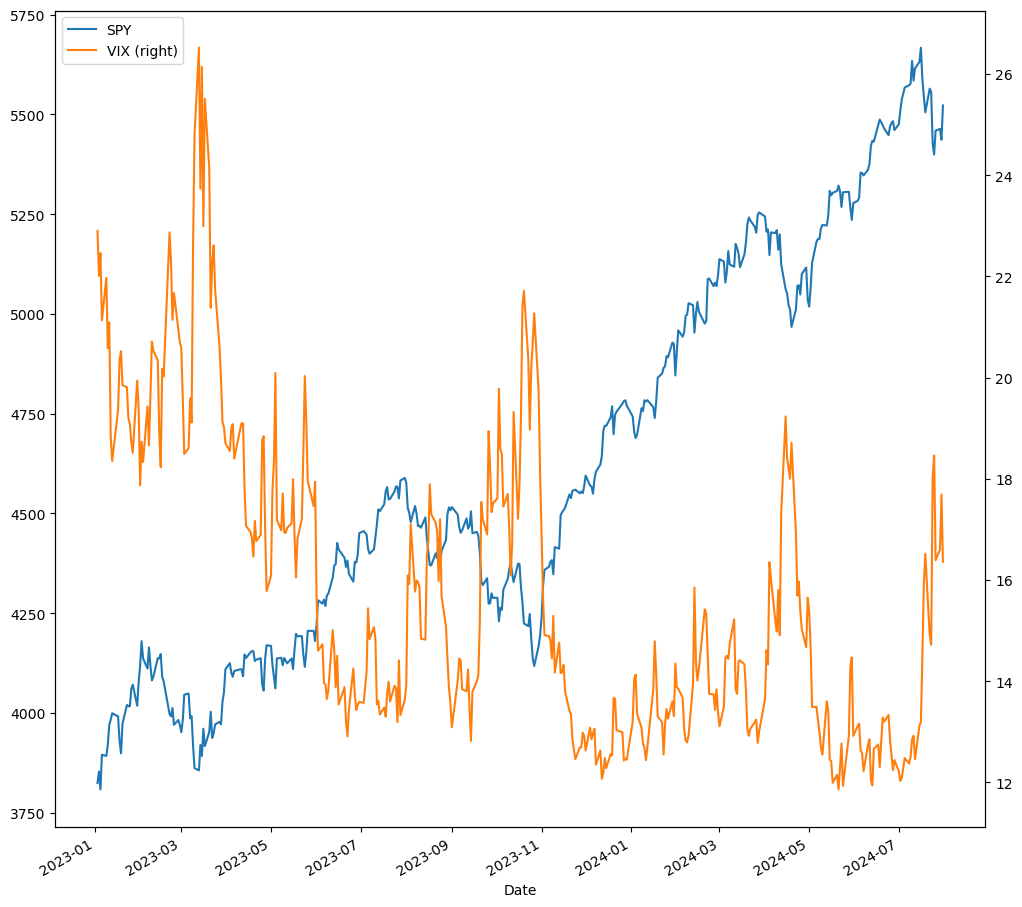

In [17]:
#visualization of relationship
df_c.loc[:'2024-07-31'].plot(figsize= (12,12),secondary_y = "VIX")

array([[<Axes: xlabel='SPY', ylabel='SPY'>,
        <Axes: xlabel='VIX', ylabel='SPY'>],
       [<Axes: xlabel='SPY', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

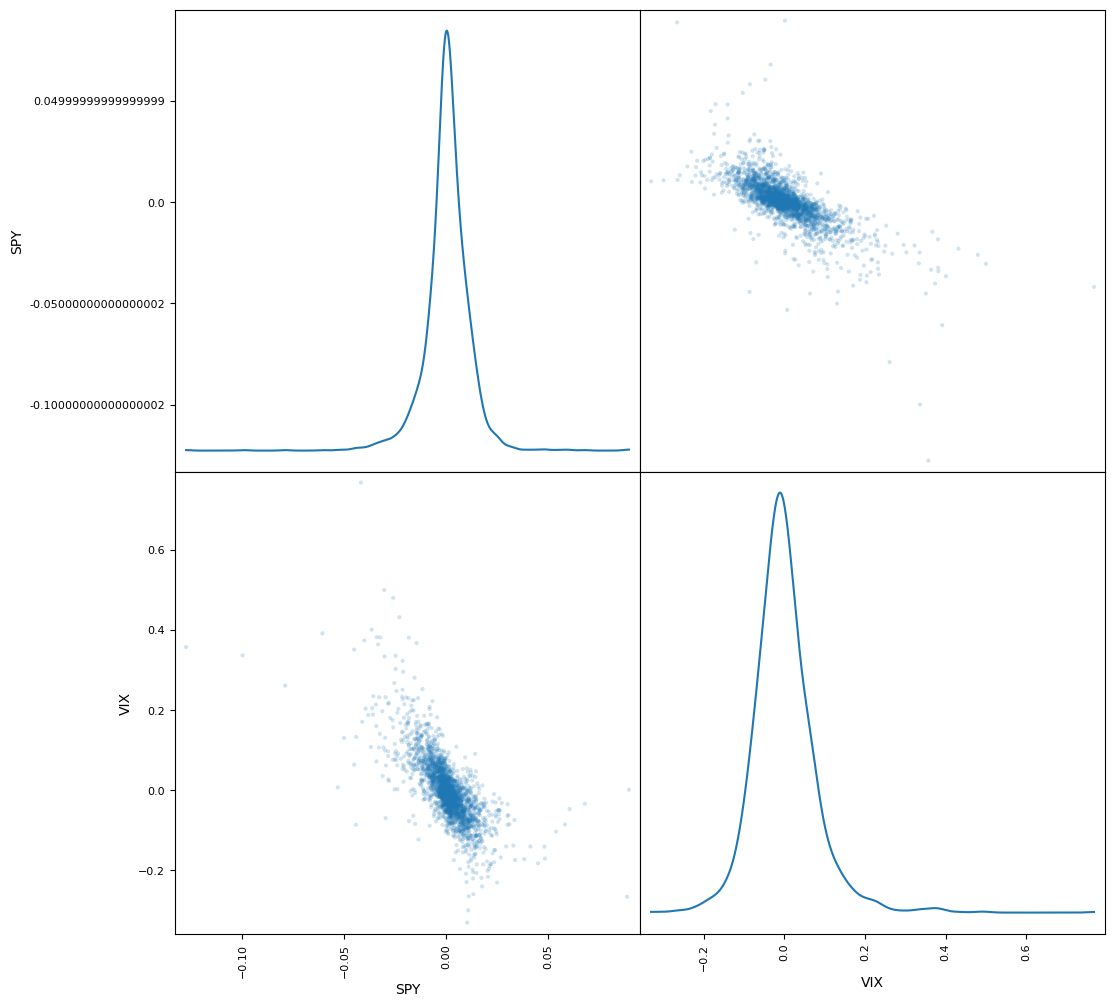

In [26]:
#to show negative relationship
grow_rate = np.log(df_c/df_c.shift(1))
grow_rate.dropna(inplace = True)
pd.plotting.scatter_matrix(grow_rate,
                           alpha = 0.2,
                           #diagonal = 'hist',
                           #hist_kwds = {'bins':50},
                           diagonal = 'kde',
                           figsize = (12,12)
                          )

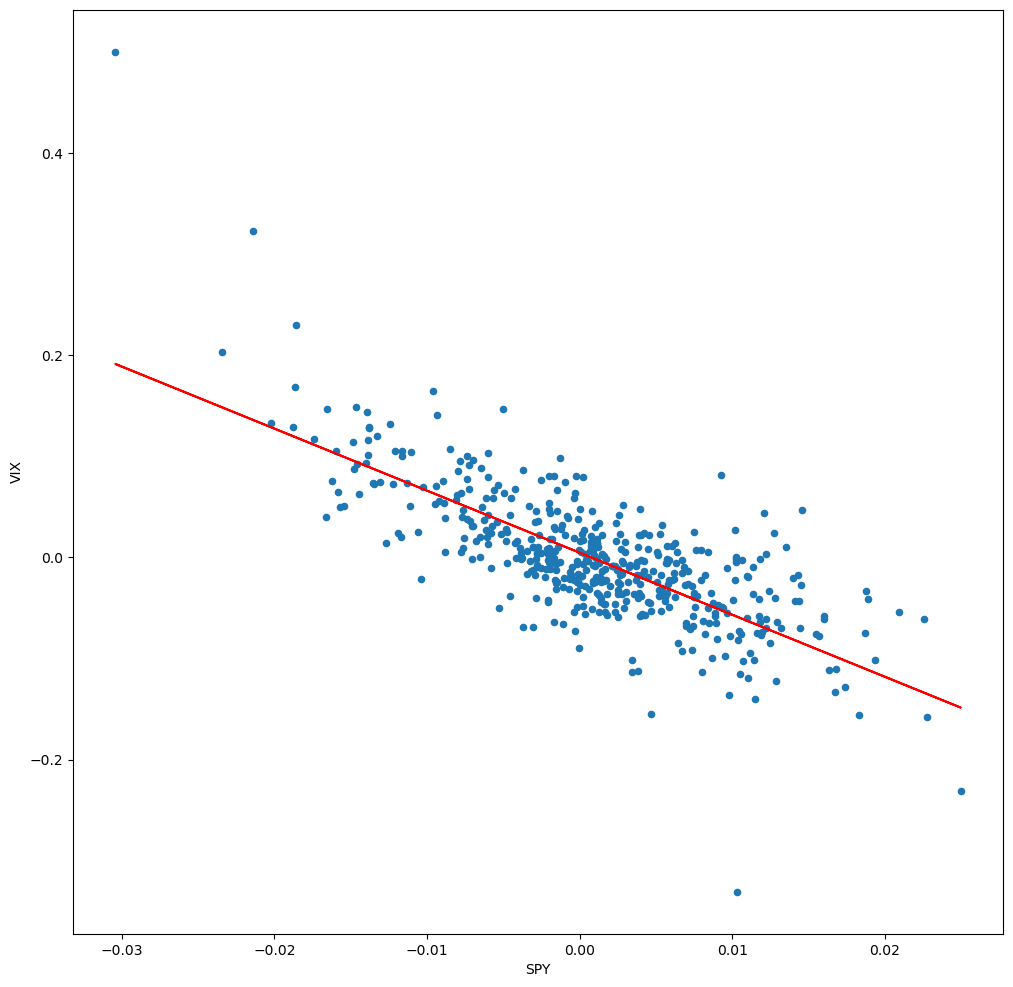

In [21]:
#built regression model para: x,y, deg:set exponent
#corelationship coefficient
regression = np.polyfit(grow_rate['SPY'],grow_rate['VIX'],deg= 1)
#grow_rate.corr()
plo = grow_rate.plot(kind='scatter',x = 'SPY',y = 'VIX',figsize = (12,12))
plo.plot(grow_rate['SPY'],np.polyval(regression,grow_rate['SPY']),'r')

<Axes: xlabel='Date'>

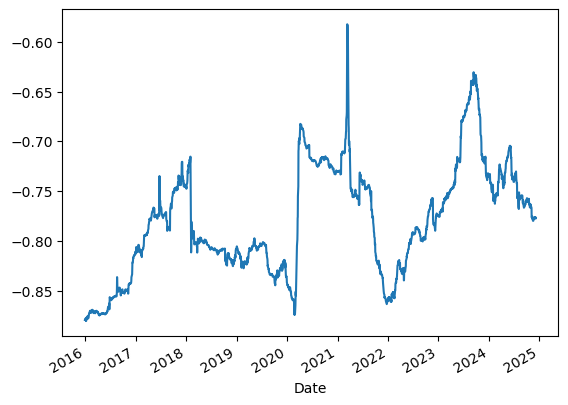

In [27]:
# computing change
grow_rate['SPY'].rolling(window = 250).corr(grow_rate['VIX']).plot()

TWO MA strategy
1. preprocessing: remove NA, check outlier
2. determining short and long
3. Execute the strategy and calculate the return

In [3]:
#preprocessing
df = close_prices[['AAPL']].dropna()

<Axes: xlabel='Date'>

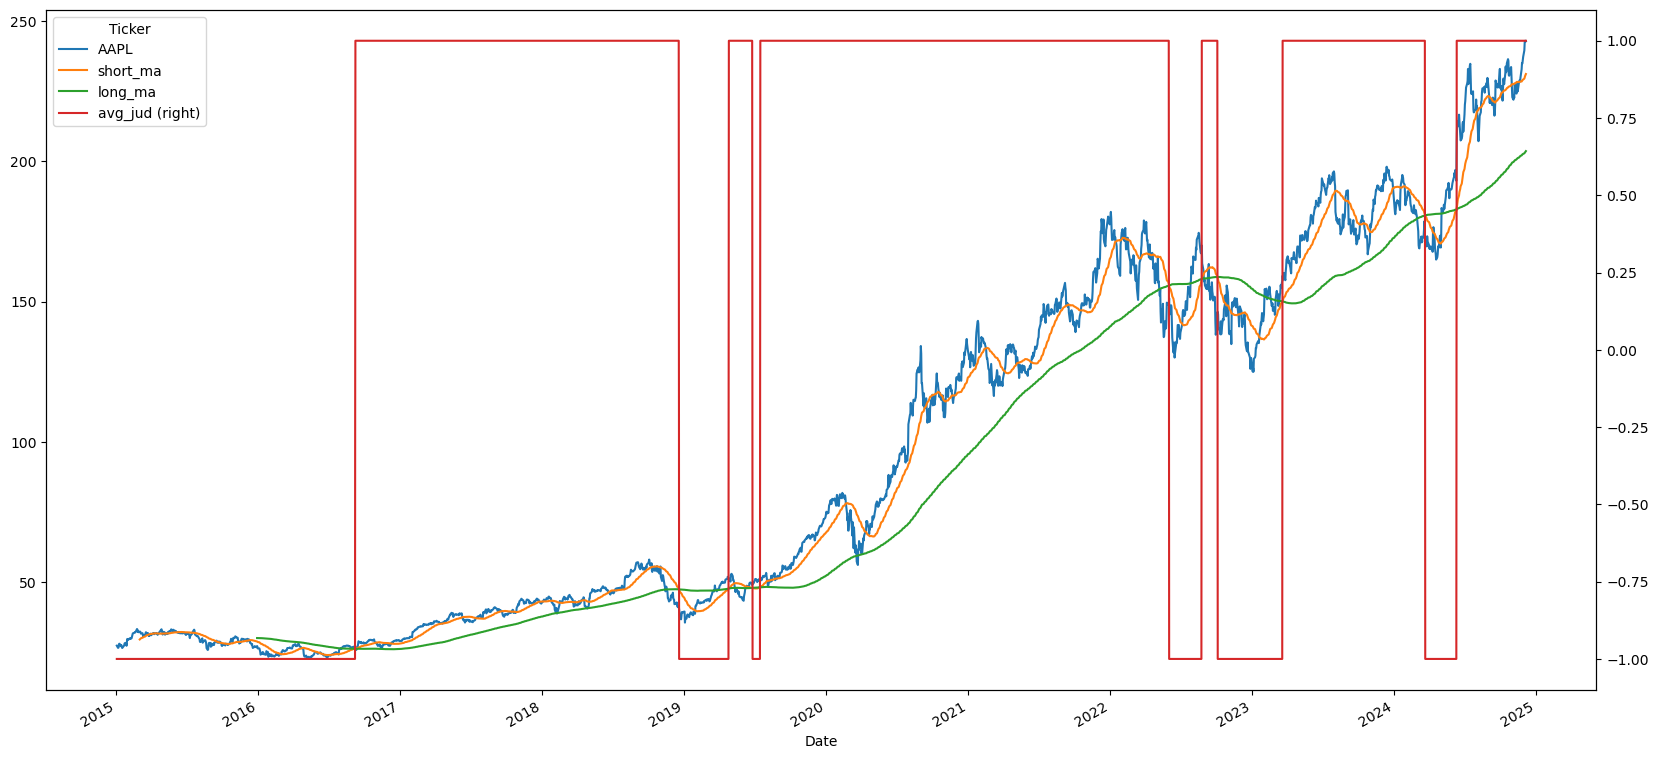

In [52]:
short_ma =40
long_ma = 250
df["short_ma"]=df['AAPL'].rolling(short_ma).mean()
df["long_ma"]=df['AAPL'].rolling(long_ma).mean()
df["avg_jud"]= np.where(df["short_ma"]>df["long_ma"],1,-1)
df[["AAPL","short_ma","long_ma","avg_jud"]].plot(figsize= (20,10),secondary_y = "avg_jud")

In [8]:
#non-strategic and strategic return
df["returns"] = np.log(df['AAPL']/df['AAPL'].shift(1))
df["st_returns"] = df['avg_jud'].shift(1)*df["returns"]
df.dropna(inplace=True)
np.exp(df[['returns','st_returns']].sum())

Ticker
returns       3.625780
st_returns    4.024199
dtype: float64

In [57]:
#Adjust parameters
from itertools import product
df = close_prices[['AAPL']].dropna()
short_ma = [20,40,60,80]
long_ma = [150,200,250,280]
res = pd.DataFrame(columns=["short_ma", "long_ma", "returns", "st_returns", "performance"])

# Traverse all combinations of (short_ma, long_ma) parameters.
for ma1, ma2 in product(short_ma, long_ma):
    if ma1 >= ma2:
        continue
    df_temp = df.copy()

    df_temp["returns"] = np.log(df_temp['AAPL'] / df_temp['AAPL'].shift(1))
    df_temp["short_ma"] = df_temp['AAPL'].rolling(ma1).mean()
    df_temp["long_ma"] = df_temp['AAPL'].rolling(ma2).mean()
    df_temp.dropna(inplace=True)
    df_temp["avg_jud"] = np.where(df_temp["short_ma"] > df_temp["long_ma"], 1, -1)
    df_temp["st_returns"] = df_temp["avg_jud"].shift(1) * df_temp["returns"]
    df_temp.dropna(inplace=True)
    performance = np.exp(df_temp[['returns', 'st_returns']].sum())

    res = pd.concat([res, pd.DataFrame({
        'short_ma': [ma1],
        'long_ma': [ma2],
        'returns': [performance['returns']],
        'st_returns': [performance['st_returns']],
        'performance': [performance['st_returns'] - performance['returns']]
    })], ignore_index=True)
print('over')

over


In [58]:
res

,short_ma,long_ma,returns,st_returns,performance
0,20,150,4.534699,4.429677,-0.105022
1,20,200,3.708899,5.563621,1.854722
2,20,250,3.625780,4.825032,1.199252
3,20,280,3.326649,3.302743,-0.023906
4,40,150,4.534699,4.986013,0.451314
5,40,200,3.708899,5.076716,1.367817
6,40,250,3.625780,4.024199,0.398419
7,40,280,3.326649,3.625577,0.298928
8,60,150,4.534699,4.922568,0.387868
9,60,200,3.708899,4.769590,1.060691


In [56]:
res


,short_ma,long_ma,returns,st_returns,performance
0,40,300,3.350749,3.591625,0.240876
1,40,340,3.393067,2.450824,-0.942243
2,40,480,3.244025,1.404376,-1.839648
3,60,300,3.350749,2.918511,-0.432238
4,60,340,3.393067,2.001044,-1.392023
5,60,480,3.244025,1.351019,-1.893005
6,80,300,3.350749,2.377669,-0.973080
7,80,340,3.393067,2.280183,-1.112884
8,80,480,3.244025,1.477360,-1.766664
